## Prepare Dataset

In [1]:
import pandas as pd
import yellowbrick as yb
from yellowbrick.features.rankd import Rank1D, Rank2D
from sklearn import preprocessing

TrainData = pd.read_csv("dataset/KDDTrain+.txt", header=None)
TrainData.columns

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

In [2]:
TrainData.describe

<bound method NDFrame.describe of         0    1         2   3     4     5   6   7   8   9   ...    33    34  \
0        0  tcp  ftp_data  SF   491     0   0   0   0   0  ...  0.17  0.03   
1        0  udp     other  SF   146     0   0   0   0   0  ...  0.00  0.60   
2        0  tcp   private  S0     0     0   0   0   0   0  ...  0.10  0.05   
3        0  tcp      http  SF   232  8153   0   0   0   0  ...  1.00  0.00   
4        0  tcp      http  SF   199   420   0   0   0   0  ...  1.00  0.00   
...     ..  ...       ...  ..   ...   ...  ..  ..  ..  ..  ...   ...   ...   
125968   0  tcp   private  S0     0     0   0   0   0   0  ...  0.10  0.06   
125969   8  udp   private  SF   105   145   0   0   0   0  ...  0.96  0.01   
125970   0  tcp      smtp  SF  2231   384   0   0   0   0  ...  0.12  0.06   
125971   0  tcp    klogin  S0     0     0   0   0   0   0  ...  0.03  0.05   
125972   0  tcp  ftp_data  SF   151     0   0   0   0   0  ...  0.30  0.03   

          35    36    37    3

### Represent columns with names
Unfortunately, the columns are represented as numbers. That is why we need to create a columns array.

In [3]:
Cols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root", "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
# Load the dataset with the new columns: 
Dataset = pd.read_csv("dataset/KDDTrain+.txt", header=None, names = Cols)

## Visualise Data

We used to_numpy() to convert the frame to its NumPy-array representation and fit_transform to calibrate the measurements.Create a visualizer and visualize data using 3 different algorithms to rank features:
- Shapiro: Shapiro-Wilk algorithm ranking algorithm
- Covariance: ranking algorithm
-  Pearson: a linear correlation algorithm

### Post-Process Data

Before visualizing data we need to pro-process the data:

In [5]:
Dataset.protocol_type = preprocessing.LabelEncoder().fit_transform(Dataset["protocol_type"])
Dataset.service = preprocessing.LabelEncoder().fit_transform(Dataset["service"])
Dataset.flag = preprocessing.LabelEncoder().fit_transform(Dataset["flag"])
Dataset.label = preprocessing.LabelEncoder().fit_transform(Dataset["label"])
X = Dataset[Cols].to_numpy()
y = Dataset.label.to_numpy()

### Shaprio

Ranking features is very helpful in feature engineering step (we are going to discuss it later in other units) to enhance the performance of our model by selecting only some specific features. 

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


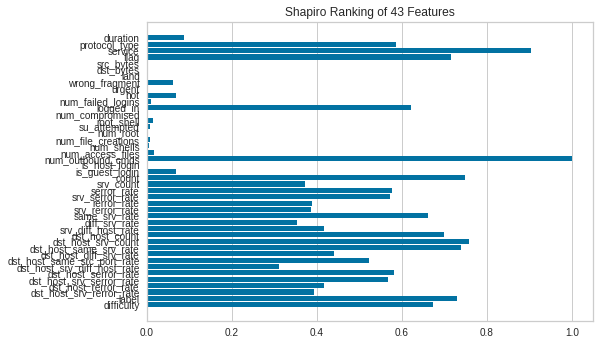

In [6]:
visualizer = Rank1D(features=Cols, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Covariance

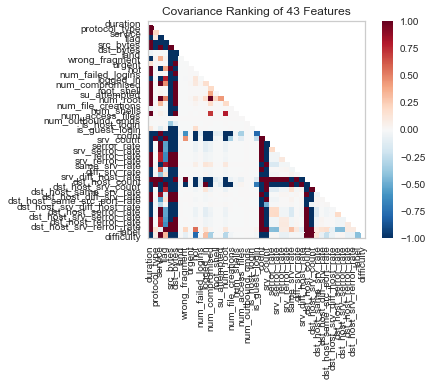

In [7]:
visualizer = Rank2D(features=Cols, algorithm='covariance')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Pearson

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


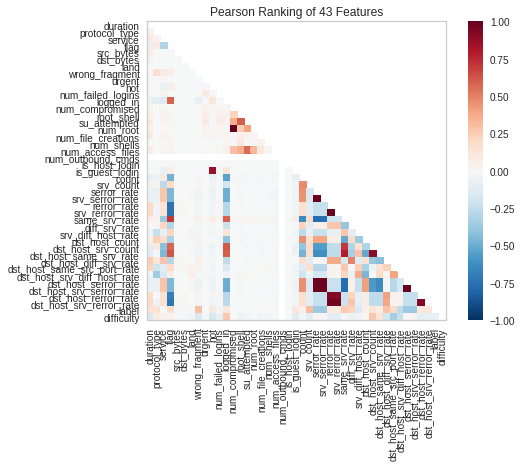

In [8]:
visualizer = Rank2D(features=Cols, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()